<a href="https://colab.research.google.com/github/yejijang-analyst/ESAA_note/blob/main/ex2_2_Visualizing_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
#탭(Tab)으로 구분된 데이터 파일
chipo = pd.read_csv(url, sep = '\t')



### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [ ]:
#qntity	는 고려 안해도 되는지???

# 아이템 이름을 인덱스로 사용하고 빈도를 열로 가지는 DataFrame

x = chipo.item_name

letter_counts = Counter(x) # 문자열의 빈도를 세어주는 함수
# 파이썬의 내장 데이터 구조인 딕셔너리(dictionary)와 유사한 형태의 객체

df = pd.DataFrame.from_dict(letter_counts,orient='index' )
#  orient='index'는 딕셔너리의 키를 DataFrame의 인덱스로 사용하도록 지정하는 옵션입니다
# 음식 이름이 인덱스가 될 것.
#  이렇게 하면 DataFrame의 열은 "0"으로 이름이 지정됩니다.

df.head()



,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [ ]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

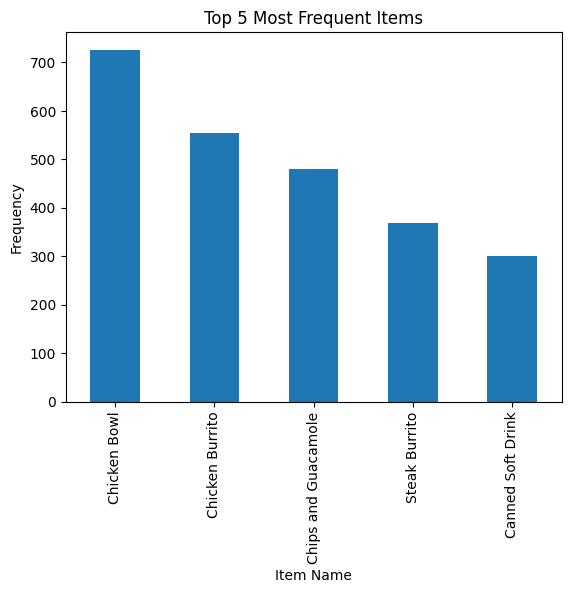

In [ ]:
data = chipo.item_name.value_counts().head(5)
data.plot(kind='bar')

plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Items')
plt.show()

 #아이템 이름의 빈도수를 나타내기 위해 data.plot(kind='bar')를 사용했지만,
 #연속적인 데이터의 분포를 표현하려면 plt.hist를 사용해야 합니다.


In [ ]:
chipo.item_name.value_counts().head(5)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0, 0.5, 'the number of items orderered')

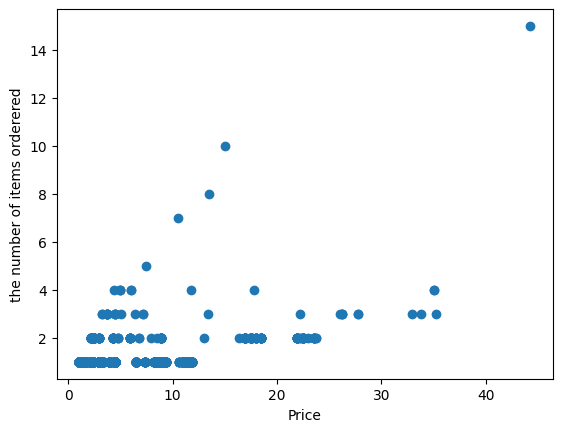

In [ ]:
# 내 풀이 오답...
# price 가 문자열임.......!!! 달려표시 지우고 float 시켜야함.
# 문제 이해도 못함. 주문 가격 당 주문 품목수 이니까 orderid 별로 생각해야함.
plt.scatter(chipo.item_price,chipo.quantity)


plt.xlabel('Price') # plt.scatter는 matplotlib.pyplot의 함수로,
#반환되는 객체는 Axes가 아니라 PathCollection입니다.
#따라서 set_title, set_xlabel, set_ylabel 등의 Axes 메서드를 직접 사용할 수 없습니다.
plt.ylabel('the number of items orderered')

In [ ]:
#value[1:-1]: 문자열 value에서 첫 번째 문자(인덱스 0)와 마지막 문자(인덱스 -1)를 제외한 부분을 선택합니다.
#즉, 첫 번째 문자와 마지막 문자를 제거하는 역할을 합니다.
#float(...): 위에서 선택한 부분을 부동소수점 숫자(float)로 변환합니다.


### Step 7. BONUS: Create a question and a graph to answer your own question.

<ipython-input-15-9eeabb17de73>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


(0.0, 36.7)

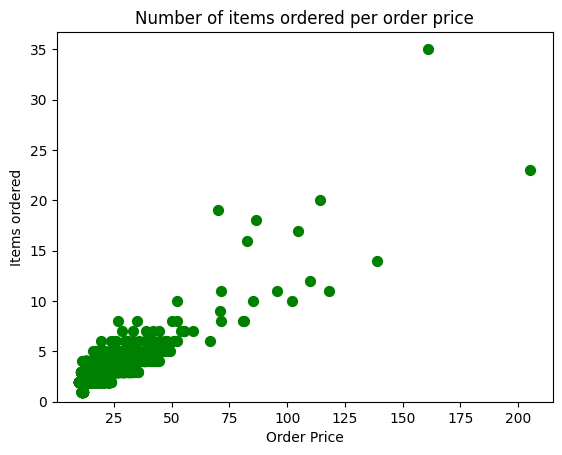

In [ ]:
# Check if item_price column contains float values, if not, perform the conversion
if not isinstance(chipo.item_price[0], float):
    chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)